# **<center>Maven Halloween Challenge - PCA using Python</center>**

### 1. Viewing the Data

In [1]:
# Reading the candy data file
import pandas as pd

data = pd.read_csv('candy-data.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [2]:
# Looking only the 1/0 columns
subset = data.iloc[:, 1:-3]
subset.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


### 2. Applying the Principal Component Analysis (PCA)

In [3]:
# Importing PCA to reduce the 9 columns into 2 columns
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(subset)

PCA(n_components=2)

In [4]:
# The 2 columns account for ~60% of the variation in the data
pca.explained_variance_ratio_

array([0.45736631, 0.15454393])

In [5]:
candy_2d = pd.DataFrame(pca.transform(subset))
candy_2d.head()

,0,1
0,1.305021,-0.335978
1,1.123628,-0.294698
2,0.034733,-0.204088
3,0.034733,-0.204088
4,-0.469043,-0.565369


<Axes: xlabel='0', ylabel='1'>

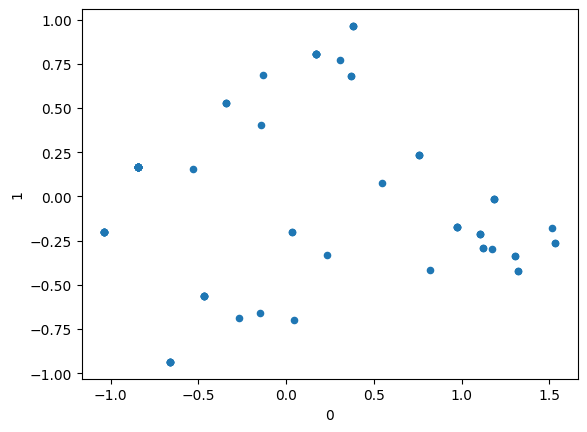

In [6]:
# Plotting the 2 columns
candy_2d.plot(kind='scatter', x = 0, y = 1)

In [7]:
# Viewing the original data again - Note that one dime & one quarter are identical
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<Axes: xlabel='x_jitter', ylabel='y_jitter'>

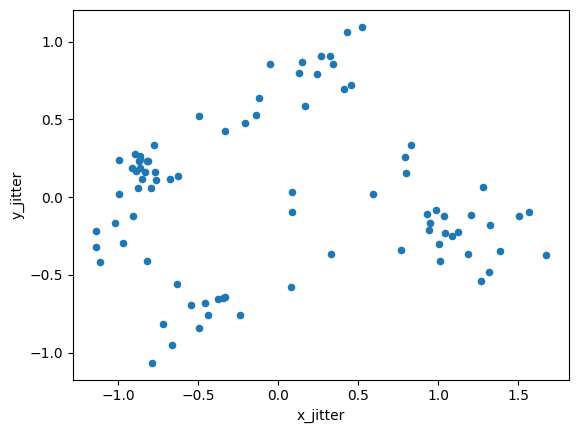

In [8]:
# Adding a bit of noise to the data and replotting the data
import numpy as np
data['x_jitter'] = candy_2d[0] + np.random.randn(85)*.1
data['y_jitter'] = candy_2d[1] + np.random.randn(85)*.1
data.plot(kind='scatter', x='x_jitter', y='y_jitter')

In [9]:
# Viewing the updated dataframe with the jitter columns
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,x_jitter,y_jitter
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1.322700,-0.180824
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.187959,-0.365831
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.089208,0.029667
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.088731,-0.098968
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,-0.334923,-0.645881


In [10]:
# Export the updated data
data.to_csv('candy-data-pca.csv')